In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.shape

(9742, 3)

In [4]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df1 = pd.read_csv('ratings.csv')

In [6]:
df1.shape

(100836, 4)

In [7]:
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [36]:
df2=pd.read_csv('tags.csv')

In [37]:
df2.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
num_unique_usersid = df1['userId'].nunique()

In [9]:
print("Number of unique userId values:", num_unique_usersid)

Number of unique userId values: 610


In [11]:
import pandas as pd

# Assuming you already have two DataFrames: movies_df and ratings_grouped_df

# Perform inner join on 'movieId'
merged_data = pd.merge(df, df1, on='movieId', how='inner')

# Display the resulting DataFrame
print(merged_data.head())


   movieId             title                                       genres   
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy  \
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483  


In [29]:
# Assuming 'ratings' is the DataFrame with columns 'movieId' and 'rating'
user_ratings_count = merged_data.groupby('movieId')['rating'].count().reset_index(name='user_rating_count')

# Find the movie with the maximum number of user ratings
max_ratings_movie = user_ratings_count.loc[user_ratings_count['user_rating_count'].idxmax()]

# Extract the movieId, title, and user rating count from the result
max_ratings_movie_id = max_ratings_movie['movieId']
max_ratings_movie_title = df[df['movieId'] == max_ratings_movie_id]['title'].values[0]
user_rating_count = max_ratings_movie['user_rating_count']

# Display the result
print("Movie with the maximum number of user ratings:")
print("MovieId:", max_ratings_movie_id)
print("Title:", max_ratings_movie_title)
print("User Rating Count:", user_rating_count)


Movie with the maximum number of user ratings:
MovieId: 356
Title: Forrest Gump (1994)
User Rating Count: 329


In [39]:

# Now you can use the code to find tags for "Matrix, The (1999)"
matrix_movie_id = df[df['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = df2[df2['movieId'] == matrix_movie_id]

# Display the result
print("Tags submitted by users for 'Matrix, The (1999)':")
print(matrix_tags[['tag']])


Tags submitted by users for 'Matrix, The (1999)':
                     tag
815         martial arts
816               sci-fi
1646  alternate universe
2794          philosophy
2795    post apocalyptic


In [20]:
movie_name = "Terminator 2: Judgment Day (1991)"

# Filter data for the specified movie
movie_ratings = merged_data[merged_data['title'] == movie_name]['rating']

# Calculate the average rating for the specified movie
average_rating = movie_ratings.mean()

print(f"Average rating for {movie_name}: {average_rating}")

Average rating for Terminator 2: Judgment Day (1991): 3.970982142857143


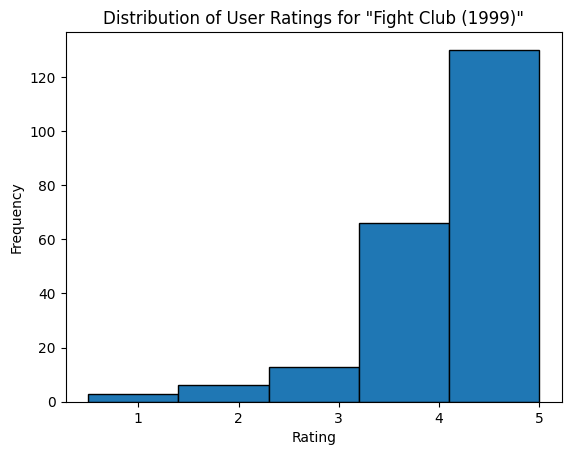

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the merged data is in a DataFrame named 'merged_df'
# If not, replace 'merged_df' with the actual DataFrame name

# Movie name to search for
movie_name = "Fight Club (1999)"

# Filter data for the specified movie
movie_ratings = merged_data[merged_data['title'] == movie_name]['rating']

# Plot a histogram of user ratings
plt.hist(movie_ratings, bins=5, edgecolor='black')
plt.title(f'Distribution of User Ratings for "{movie_name}"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In the above graph shows, It is a Left Skewed Distribution